In [1]:
# Calcula un índice por país de exposición al cambio climático 

# Importamos librerías
import os
import numpy as np
import pandas as pd
from scipy import stats
import xarray as xr
import geopandas as gpd
import xesmf as xe
import rioxarray as rio
import geoviews as gv

# Parámetros de mapas
gv.extension("matplotlib")
def hook(plot, element):
    cax = plot.handles["cax"]
    ax = plot.handles["axis"]
    bbox = ax.get_position()
    l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height
    cax.set_position([l, 0.9*b, w, 0.05*h])
options = { "hooks": [hook], "ylim":(-62,85), "xlim":(-180,180),
    "colorbar": True,  "colorbar_opts": {"orientation": "horizontal"} } 
options_r = { "colorbar": True, "linewidth": 0.4, "hooks": [hook],
    "colorbar_opts": {"orientation": "horizontal"},
    "cmap": "plasma_r", "ylim":(-62,85), "xlim":(-180,180) }
options_m = { "bgcolor": "lightgray", "fontscale": 2, "aspect": 2.25 }

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
# Datos

# Códigos nacionales
ix  = "ISO_A3"

# Carpetas
path_r = "../results/"

# Archivos de CCKP
wb_path = "../../Bases_de_datos/CCKP_NetCDF/"
wb_files = os.listdir(wb_path)
for i, f in enumerate(wb_files):
    if f[0] in ["~", "."]: wb_files.remove(f)
# Vemos el número de índice de cada variable
for i, f in enumerate(wb_files): print(f"{i}: {f}")

# Catálogo de datos
path_catalog = "../../Bases_de_datos/Data_catalog.csv"
df_c = pd.read_csv(path_catalog)

# Tabla base
iso = "../../Bases_de_datos/Country_ISO_code.csv"
df_iso = pd.read_csv(iso).set_index("alpha-3")
df_iso.index.name = ix

# Mapas
borders_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_admin_0_countries" )
borders = gpd.read_file(borders_path).drop(
    columns = [ix] ).set_index("ISO_A3_EH")
borders.index.name = ix
borders = borders[ borders["ISO_N3_EH"] != "-99" ]
borders = borders[ ~borders.index.duplicated() ]
borders["Area"] = borders.to_crs(8857).area
# Relación código-número de país
names = borders[ ["NAME", "ISO_N3_EH"] ].drop_duplicates(
    subset = "ISO_N3_EH" ).reset_index().set_index("ISO_N3_EH")
names.index = names.index.astype(int)

# Contorno de países
countries = gv.Path( borders[["geometry"]]
    ).opts( linewidth = 0.4, color = "k" )

# Océano
ocean_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_ocean" )
ocean = gv.Polygons( gpd.read_file(ocean_path), vdims = "min_zoom"
    ).opts( linewidth = 0, cmap = "Paired")

0: climatology-pr-annual-mean_cmip6-x0.25_ensemble-all-historical_climatology_median_1995-2014.nc
1: climatology-popcount-annual-mean_pop-x0.25_gpw-v4-rev11-ssp245_climatology_mean_2040-2059.nc
2: climatology-spei12-annual-mean_cmip6-x0.25_ensemble-all-historical_climatology_median_1995-2014.nc
3: climatology-rx1day-annual-mean_cmip6-x0.25_ensemble-all-ssp245_climatology_median_2040-2059.nc
4: climatology-popcount-annual-mean_pop-x0.25_gpw-v4-rev11-historical_climatology_mean_1995-2014.nc
5: climatology-hd40-annual-mean_cmip6-x0.25_ensemble-all-historical_climatology_median_1995-2014.nc
6: climatology-pr-annual-mean_cmip6-x0.25_ensemble-all-ssp245_climatology_median_2040-2059.nc
7: climatology-hd40-annual-mean_cmip6-x0.25_ensemble-all-ssp245_climatology_median_2040-2059.nc
8: climatology-spei12-annual-mean_cmip6-x0.25_ensemble-all-ssp245_climatology_median_2040-2059.nc
9: climatology-rx1day-annual-mean_cmip6-x0.25_ensemble-all-historical_climatology_median_1995-2014.nc


In [3]:
# Nombres de índicadores relevantes por país
c_names = [
    "Historical population",
    "2050 SSP2-4.5 population",
    "Flood plain population 2000",
    "% Flood plain Population 2000",
    "Flood plain population 2060",
    "% Flood plain Population 2060",
    "Historical drought exposed population",
    "Historical % drought exposed population",
    "2050 SSP2-4.5 drought exposed population",
    "2050 SSP2-4.5 % drought exposed population",
    "Historical extreme temperature exposed population",
    "Historical % extreme temperature exposed population",
    "2050 SSP2-4.5 extreme temperature exposed population",
    "2050 SSP2-4.5 % extreme temperature exposed population",
    "Historical extreme rainfall exposed population",
    "Historical % extreme rainfall exposed population",
    "2050 SSP2-4.5 extreme rainfall exposed population",
    "2050 SSP2-4.5 % extreme rainfall exposed population",
    "Historical hurricane exposed population",
    "Historical % hurricane exposed population",
    "2050 SSP2-4.5 hurricane exposed population",
    "2050 SSP2-4.5 % hurricane exposed population"
    ]

# Nombres de índices
index_n = [
    "Sea-level rise exposure index",
    "Drought exposure index",
    "Extreme temperature exposure index",
    "Extreme rainfall exposure index",
    "Hurricane exposure index",
    "Climate change exposure index"
    ]

In [4]:
# Función de mapa de variable espacial
def do_map(var_h, var_f, vn_plot_h, vn_plot_f, cmap):
    # Histórico
    # Nombre en mapa
    ds_map_h = var_h.rename( {v: vn_plot_h } )
    # Recortamos a zona terrestre
    ds_map_h[vn_plot_h] = ds_map_h[vn_plot_h].fillna(0)
    ds_map_h = ds_map_h.rio.write_crs(borders.crs)
    ds_map_h = ds_map_h.rio.set_spatial_dims("lon", "lat")
    ds_map_h = ds_map_h.rio.clip( borders.dissolve().geometry,
        drop = False, invert = False, all_touched = True )

    # Futuro
    # Nombre en mapa
    ds_map_f = var_f.rename( {v: vn_plot_f } )
    # Recortamos a zona terrestre
    ds_map_f[vn_plot_f] = ds_map_f[vn_plot_f].fillna(0)
    ds_map_f = ds_map_f.rio.write_crs(borders.crs)
    ds_map_f = ds_map_f.rio.set_spatial_dims("lon", "lat")
    ds_map_f = ds_map_f.rio.clip( borders.dissolve().geometry,
        drop = False, invert = False, all_touched = True )

    # Rangos de paleta de colores
    min_v = min( np.floor( np.nanmin(ds_map_h[vn_plot_h].values) ),
        np.floor( np.nanmin(ds_map_f[vn_plot_f].values) ) )
    max_v = max( np.ceil( np.nanmax(ds_map_h[vn_plot_h].values) ),
        np.ceil( np.nanmax(ds_map_f[vn_plot_f].values) ) )

    # Mapa histórico
    v_map_h = gv.Image( gv.Dataset( ds_map_h, ["lon", "lat"],
        vdims = gv.Dimension(vn_plot_h, range = ( min_v, max_v ) ) )
        ).opts( cmap = cmap, **options )
    map = ( v_map_h * ocean * countries ).opts( **options_m )
    gv.output( map, size = 600 )
    # Mapa futuro
    v_map_f = gv.Image( gv.Dataset( ds_map_f, ["lon", "lat"],
        vdims = gv.Dimension(vn_plot_f, range = ( min_v, max_v ) ) )
        ).opts( cmap = cmap, **options )
    map = ( v_map_f * ocean * countries ).opts( **options_m )
    gv.output( map, size = 600 )

    # Mapa de índice
    # Variables globales
    borders[vn] = df_iso[vn]
    map_v = gv.Polygons( borders, vdims = vn ).opts( **options_r )
    map = ( ocean * map_v ).opts( **options_m )
    gv.output( map, size = 600 )

# Calcula la exposición
def exposicion(v, tr, var_i, pop_i, df_pop_i):
    ds_i = var_i.copy()
    # Calculamos el peligro extremo
    if v == "climatology-spei12-annual-mean":
        ds_i[v] = ds_i[v].where( ds_i[v] <= tr, 0 )
    else:
        ds_i[v] = ds_i[v].where( ds_i[v] >= tr, 0 )
    ds_i[v] = ds_i[v].where( ds_i[v] == 0, 1 )
    # Calculamos la exposición espacial
    ds_i["Exposed population"] = pop_i[p] * ds_i[v]
    df_i = ds_i[ [v, "Exposed population"] ].to_dataframe(
        ).reset_index("time", drop = True)
    # Población de cada celda
    df_i[p] = df_pop_i[p]
    # País de cada celda
    df_i["country"] = df_pop_i["country"]
    df_i = df_i.reset_index().set_index("country")
    df_i = df_i[ ~df_i.index.isnull() ]
    # Exposición por país
    df_ic = df_i[ [p, "Exposed population"] ].groupby("country").sum()
    df_ic["% Exposed population"] = ( df_ic["Exposed population"] / df_ic[p] )
    # Asignamos el código de país correspondiente
    # names es variable global
    df_ic[ix] = names[ix]
    df_ic = df_ic.reset_index().set_index(ix)
    
    return df_ic

# Calcula el índice
def indice(vn, j, df_hc, df_fc):
    df_fc[vn] = df_fc["% Exposed population"] - df_hc["% Exposed population"]

    # Guardamos los valores relevantes por país
    df_iso[c_names[j]] = df_hc["Exposed population"]
    df_iso[c_names[j+1]] = df_hc["% Exposed population"]
    df_iso[c_names[j+2]] = df_fc["Exposed population"]
    df_iso[c_names[j+3]] = df_fc["% Exposed population"]

    # Solo se toman valores donde aumenta la exposición
    # df_iso es variable global
    df_iso[vn] = df_fc[vn]
    df_iso[vn] = df_iso[vn].where( df_iso[vn] > 0, 0 )
    # Normalización 0-10
    min_v = df_iso[vn].min()
    max_v = df_iso[vn].max()
    rng_v = max_v - min_v
    df_iso[vn] = 10 * ( df_iso[vn] - min_v ) / rng_v

In [5]:
# Población por país
p = "climatology-popcount-annual-mean"

# Datos históricos
# Cargamos datos
i = 4
pop_h = xr.open_dataset(wb_path + wb_files[i])
pop_h = pop_h.rio.write_crs(borders.crs)
# Preparamos variable de país
pop_h["country"] = pop_h[p].copy()

# Países grandes
gdf_b = borders[borders["Area"] >= 1e9]
# Países chicos
gdf_s = borders[borders["Area"] < 1e9]

# Recortamos el NetCDF con las geometrías de los países
# y le asignamos el número de país a cada celda
# Iteramos para países grandes
for i in gdf_b.index:
    # Malla con número de país
    ds_c = xr.full_like( pop_h[[p]],
        int(gdf_b.loc[gdf_b.index == i, "ISO_N3_EH"].iloc[0]) )
    # Recortamos la forma del país
    # Solo contamos las celdas que caen dentro del país
    pop_w = ds_c.rio.clip( gdf_b[gdf_b.index == i].geometry,
        drop = False, invert = False,all_touched = False )
    # Asignamos a la malla general
    pop_h["country"] = pop_h["country"].where( pop_w[p].isnull(), pop_w[p] )

# Se asigna el país de la celda adyacente a las
# celdas costeras que no cayeron dentro de un país
# Malla original
iso = pop_h["country"].values.copy()
# Malla donde asignaremos a celdas adyacentes
iso_c  = iso.copy()
# Se repite dos veces para maximizar la cantidad de celdas que aignamos
for l in range(2):
    # Iteramos para cada celda
    for i in range(iso.shape[1]):
        for j in range(iso.shape[2]):

            # Índices de celdas adyacentes
            i_l = i - 1
            i_p = i + 1
            j_l = j - 1
            j_p = j + 1

            # Malla cíclica
            if i_l < 0: i_l = iso.shape[1] - 1
            if i_p == iso.shape[1]: i_p = 0
            if j_l < 0: j_l = iso.shape[2] - 1
            if j_p == iso.shape[2]: j_p = j

            # Celdas adyacentes
            adj = [0] * 8
            adj[0] = iso[0, i_l, j_p]
            adj[1] = iso[0, i, j_p]
            adj[2] = iso[0, i_p, j_p]
            adj[3] = iso[0, i_l, j]
            cell =  iso[0, i, j]
            adj[4] = iso[0, i_p, j]
            adj[5] = iso[0, i_l, j_l]
            adj[6] = iso[0, i, j_l]
            adj[7] = iso[0, i_p, j_l]

            # Ignoramos mar y celdas que ya tienen asignado un país.
            if ( np.isnan(cell)
                or (cell in borders["ISO_N3_EH"].astype(int).values) ):
                pass
            else:
                adj_c = []
                # Verificamos los países adyacentes a la celda
                for k in adj:
                    if k in borders["ISO_N3_EH"].astype(int).values:
                        adj_c.append(k)
                # Asignamos el país más común entre los adyacentes
                if len(adj_c) > 0:
                    m = stats.mode(adj_c)[0]
                    if not (type(m) == np.float32): m = m[0]
                    iso_c[0, i, j] = int(m)

# Malla con los valores adyacentes corregidos
pop_h["country"] = ( ("time", "lat", "lon"), iso_c )

# Recortamos el NetCDF con las geometrías de los países
# y le asignamos el número de país a cada celda
# Iteramos para países chicos
for i in gdf_s.index:
    # Malla con número de país
    ds_c = xr.full_like( pop_h[["climatology-popcount-annual-mean"]],
        int(gdf_s.loc[gdf_s.index == i, "ISO_N3_EH"].iloc[0]) )
    # Recortamos la forma del país
    # Contamos  todas las celdas que tocan el país
    pop_w = ds_c.rio.clip( gdf_s[gdf_s.index == i].geometry,
        drop = False, invert = False, all_touched = True )
    # Asignamos a la malla general
    pop_h["country"] = pop_h["country"].where( pop_w[p].isnull(), pop_w[p] )

# Se asigna el país de la celda adyacente a las
# celdas costeras que no cayeron dentro de un país
# Malla original
iso = pop_h["country"].values.copy()
# Malla donde asignaremos a celdas adyacentes
iso_c  = iso.copy()
# Se repite dos veces para maximizar la cantidad de celdas que aignamos
for l in range(2):
    # Iteramos para cada celda
    for i in range(iso.shape[1]):
        for j in range(iso.shape[2]):

            # Índices de celdas adyacentes
            i_l = i - 1
            i_p = i + 1
            j_l = j - 1
            j_p = j + 1

            # Malla cíclica
            if i_l < 0: i_l = iso.shape[1] - 1
            if i_p == iso.shape[1]: i_p = 0
            if j_l < 0: j_l = iso.shape[2] - 1
            if j_p == iso.shape[2]: j_p = j

            # Celdas adyacentes
            adj = [0] * 8
            adj[0] = iso[0, i_l, j_p]
            adj[1] = iso[0, i, j_p]
            adj[2] = iso[0, i_p, j_p]
            adj[3] = iso[0, i_l, j]
            cell =  iso[0, i, j]
            adj[4] = iso[0, i_p, j]
            adj[5] = iso[0, i_l, j_l]
            adj[6] = iso[0, i, j_l]
            adj[7] = iso[0, i_p, j_l]

            # Ignoramos mar y celdas que ya tienen asignado un país.
            if ( np.isnan(cell)
                or (cell in borders["ISO_N3_EH"].astype(int).values) ):
                pass
            else:
                adj_c = []
                # Verificamos los países adyacentes a la celda
                for k in adj:
                    if k in borders["ISO_N3_EH"].astype(int).values:
                        adj_c.append(k)
                # Asignamos el país más común entre los adyacentes
                if len(adj_c) > 0:
                    m = stats.mode(adj_c)[0]
                    if not (type(m) == np.float32): m = m[0]
                    iso_c[0, i, j] = int(m)
                # En la última iteración eliminamos celdas aisladas
                elif l == 1: iso_c[0, i, j] = np.nan

# Malla con los valores adyacentes corregidos
pop_h["country"] = ( ("time", "lat", "lon"), iso_c )

# Guardamos
pop_h.to_netcdf(path_r + "countries.nc")
# Pasamos a tabla
df_pop_h = pop_h[ [p, "country"] ].to_dataframe(
    ).drop(columns = ["spatial_ref"] ).reset_index("time", drop = True)


# Datos futuros
# Cargamos datos
i = 1
pop_f = xr.open_dataset(wb_path + wb_files[i])
# Pasamos a tabla
df_pop_f = pop_f[ [p] ].to_dataframe().reset_index("time", drop = True)
# Asignamos la malla de país histórica
# Asumimos que no hay cambios de celdas marítimas a terrestres
df_pop_f["country"] = df_pop_h["country"]

# Sumamos la población de las celdas de cada país
df_iso[c_names[0]] = None
df_iso[c_names[1]] = None
for row in df_iso.itertuples():
    df_iso.loc[row.Index, c_names[0]] = df_pop_h.loc[
        df_pop_h["country"] == row._3, p ].sum()
    df_iso.loc[row.Index, c_names[1]] = df_pop_f.loc[
        df_pop_f["country"] == row._3, p ].sum()    

# 10 países más altos
df_iso[["name", c_names[0]]].sort_values(
    c_names[0], ascending = False).head(10)

name Historical population
ISO_A3                                                
CHN                        China          1297930752.0
IND                        India          1111700224.0
USA     United States of America           295846464.0
IDN                    Indonesia           224981712.0
BRA                       Brazil           182549488.0
PAK                     Pakistan           160344256.0
RUS           Russian Federation           146239920.0
BGD                   Bangladesh           142401696.0
NGA                      Nigeria           136502224.0
JPN                        Japan           126698456.0

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Sea-level rise exposure index)
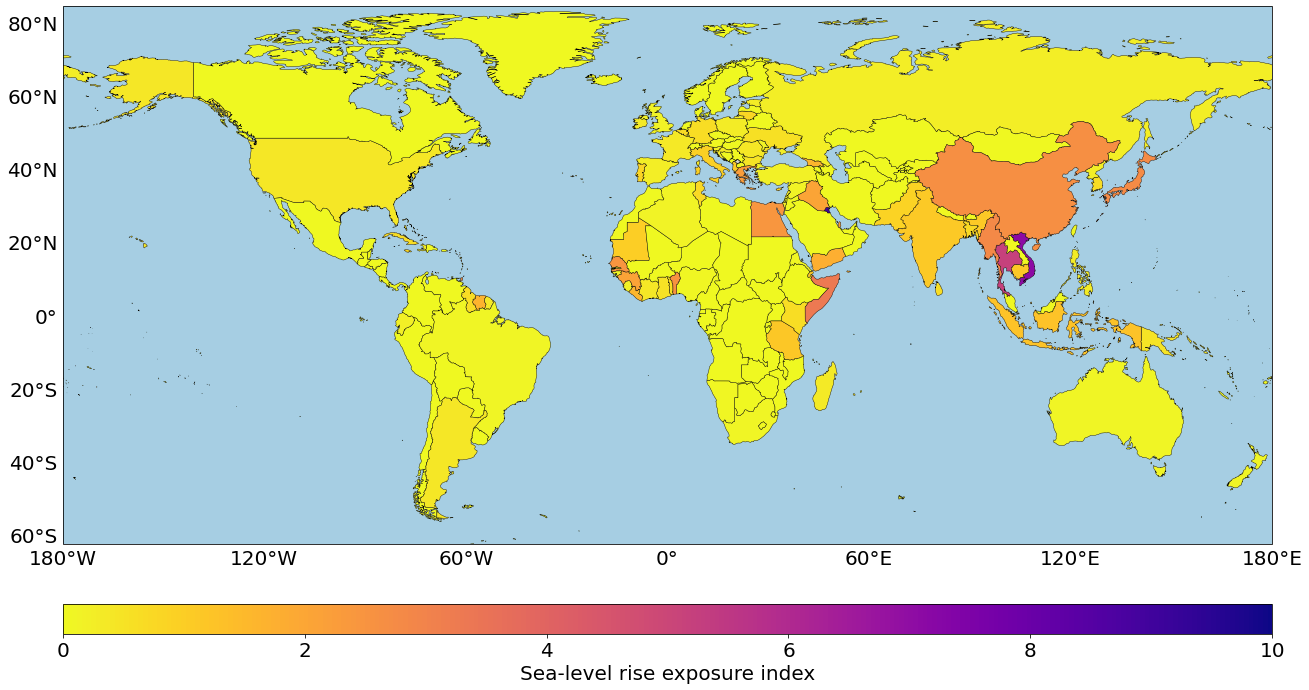

name  Sea-level rise exposure index  \
ISO_A3                                                     
MCO                Monaco                      10.000000   
KWT                Kuwait                       8.990419   
MAC                 Macao                       8.866994   
ABW                 Aruba                       7.715355   
VNM              Viet Nam                       7.083884   
MSR            Montserrat                       5.994232   
THA              Thailand                       5.186552   
WLF     Wallis and Futuna                       4.142665   
GIB             Gibraltar                       3.901301   
AIA              Anguilla                       3.831151   

        Flood plain population 2000  % Flood plain Population 2000  \
ISO_A3                                                               
MCO                         10675.0                      30.500000   
KWT                        306358.0                      15.783514   
MAC                         74167.0                      17.168287   
ABW                         14868.0                      16.520000   
VNM                      26287905.0                      33.378076   
MSR                           295.0                       5.900000   
THA                       3472037.0                       5.497644   
WLF                          3507.0                      25.050000   
GIB                          9862.0                      36.525926   
AIA                          1792.0                      16.290909   

        Flood plain population 2060  % Flood plain Population 2060  
ISO_A3                                                              
MCO                         14695.0                      40.819444  
KWT                       1393148.0                      25.061126  
MAC                        218707.0                      26.318532  
ABW                         24237.0                      24.481818  
VNM                      41089844.0                      40.688251  
MSR                           846.0                      12.085714  
THA                       7406343.0                      10.849877  
WLF                          3519.0                      29.325000  
GIB                         10949.0                      40.551852  
AIA                          3644.0                      20.244444

In [6]:
# Ïndice de nivel del mar

id = "pone.0118571.s004"
# Datos relevantes por país
col = [
    "Major area, region, country or area",
    "Baseline - total population 2000 [thousand]",
    "Baseline - Flood plain population 2000",
    "Scenario D - Total population 2060 [thousand]",
    "Scenario D - Flood plain population 2060",
    ]

# Cargamos el archivo
df_hc = pd.read_csv( "../../"
    + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0],
    index_col = "alpha-3", )
df_hc = df_hc.loc[ df_hc.index != "-99", col ]
df_fc = df_hc.copy()

# Porcentaje de población expuesta
df_hc["Exposed population"] = df_hc["Baseline - Flood plain population 2000"]
df_fc["Exposed population"] = df_fc["Scenario D - Flood plain population 2060"]
df_hc["% Exposed population"] = 100 * df_hc[col[2]] / ( df_hc[col[1]] * 1000 )
df_fc["% Exposed population"] = 100 * df_fc[col[4]] / ( df_fc[col[3]] * 1000 )

# Cálculo del índice
vn = index_n[0]
indice(vn, 2, df_hc, df_fc)

# Mapa
borders[vn] = df_iso[vn]
map_v = gv.Polygons( borders, vdims = vn ).opts( **options_r )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# 10 países más altos
df_iso[["name", vn] + c_names[2:6]].sort_values(
    vn, ascending = False ).head(10)

:Overlay
   .Image.I    :Image   [lon,lat]   (Average 12-month SPEI, 1995-2014)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
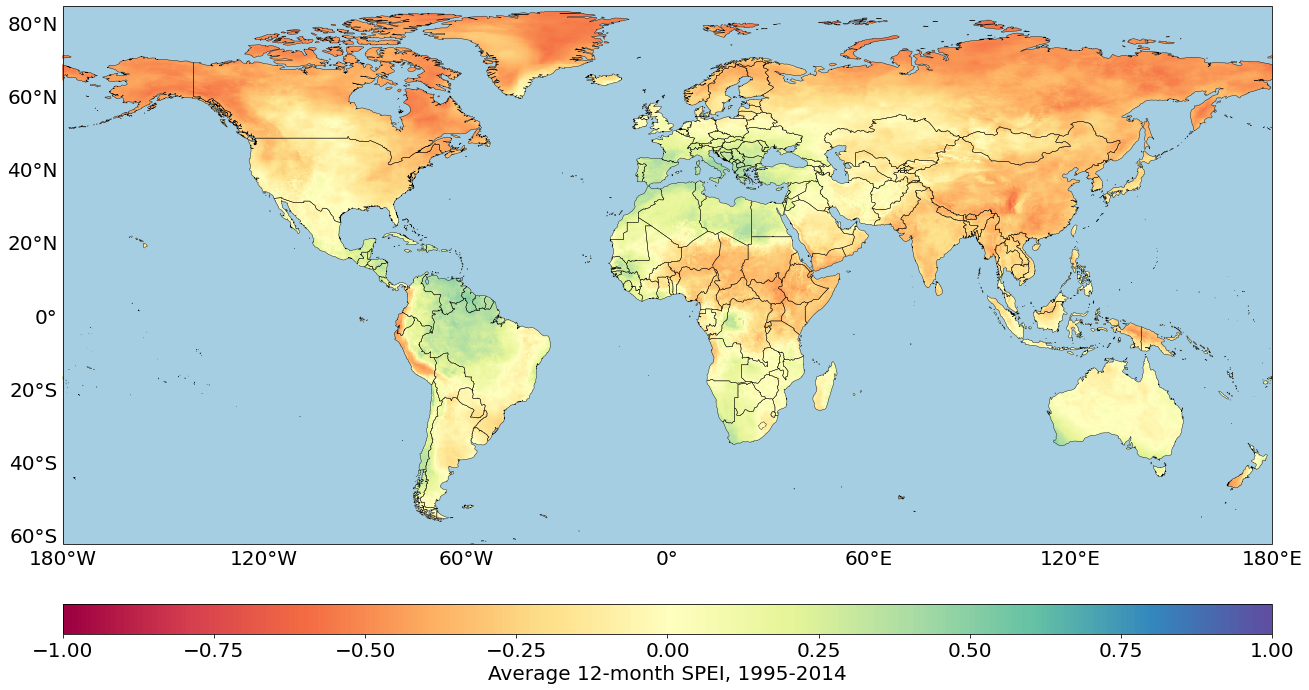

:Overlay
   .Image.I    :Image   [lon,lat]   (Average 12-month SPEI, 2040-2060, climate scenario SSP2-4.5)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
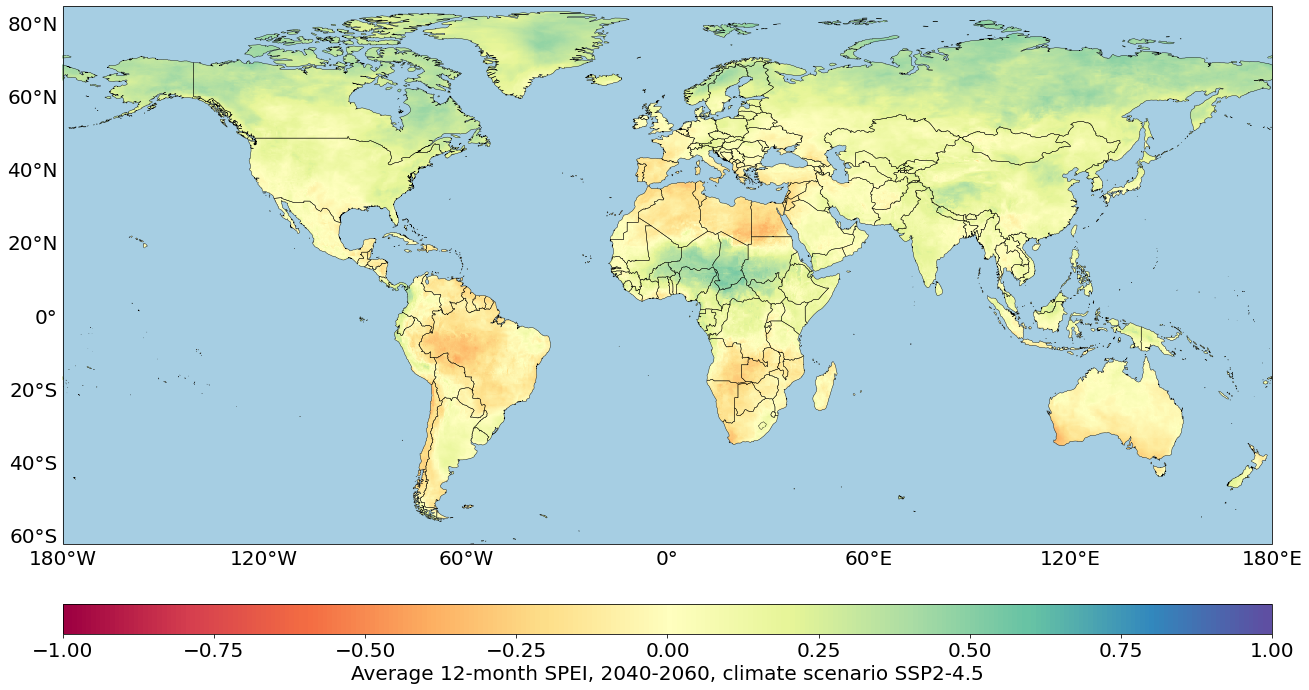

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Drought exposure index)
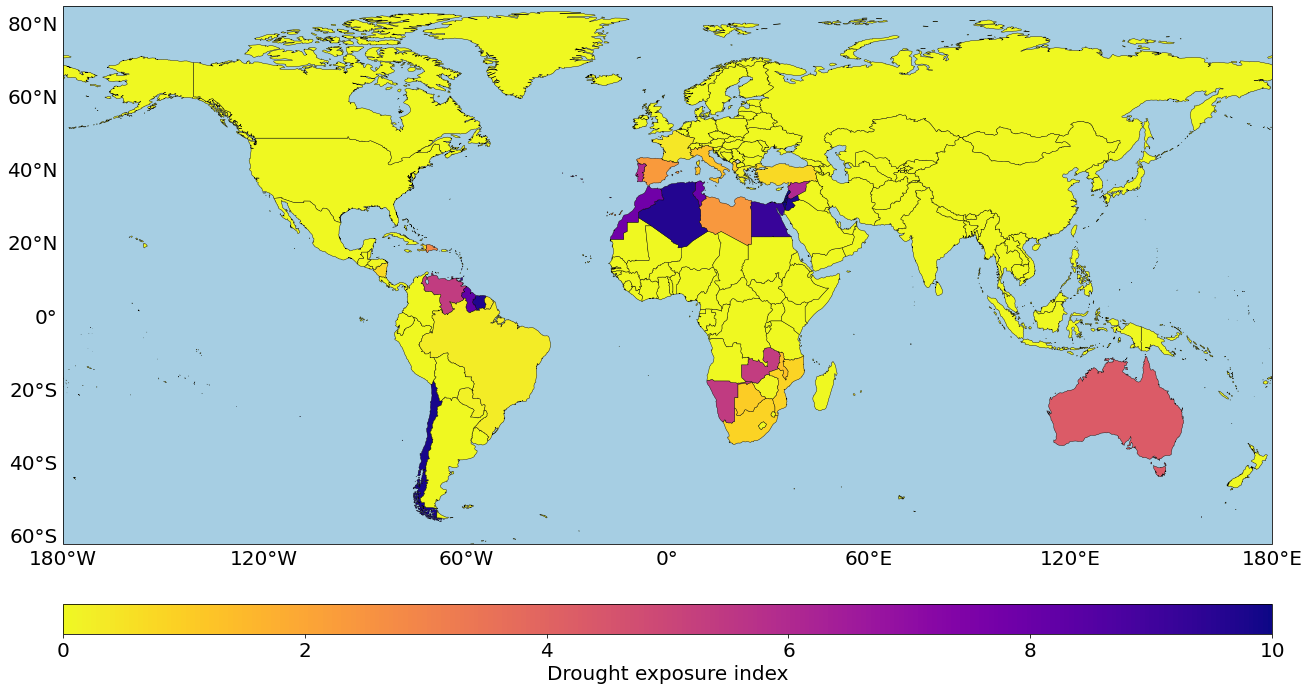

name  Drought exposure index  \
ISO_A3                                                
LBN                 Lebanon               10.000000   
PCN                Pitcairn               10.000000   
ISR                  Israel               10.000000   
PSE     Palestine, State of               10.000000   
DMA                Dominica               10.000000   
CHL                   Chile                9.841740   
SUR                Suriname                9.697445   
JOR                  Jordan                9.692721   
DZA                 Algeria                9.641745   
TTO     Trinidad and Tobago                9.305741   

        Historical drought exposed population  \
ISO_A3                                          
LBN                                  0.000000   
PCN                                  0.000000   
ISR                                  0.000000   
PSE                                  0.000000   
DMA                                  0.000000   
CHL                               7208.810059   
SUR                                  0.000000   
JOR                                  0.000000   
DZA                               7193.931152   
TTO                                  0.000000   

        Historical % drought exposed population  \
ISO_A3                                            
LBN                                    0.000000   
PCN                                    0.000000   
ISR                                    0.000000   
PSE                                    0.000000   
DMA                                    0.000000   
CHL                                    0.000447   
SUR                                    0.000000   
JOR                                    0.000000   
DZA                                    0.000220   
TTO                                    0.000000   

        2050 SSP2-4.5 drought exposed population  \
ISO_A3                                             
LBN                                 4.804990e+06   
PCN                                 6.500599e+01   
ISR                                 1.283378e+07   
PSE                                 8.080783e+06   
DMA                                 7.616306e+04   
CHL                                 2.007530e+07   
SUR                                 6.372544e+05   
JOR                                 1.209987e+07   
DZA                                 4.714332e+07   
TTO                                 1.091774e+06   

        2050 SSP2-4.5 % drought exposed population  
ISO_A3                                              
LBN                                       1.000000  
PCN                                       1.000000  
ISR                                       1.000000  
PSE                                       1.000000  
DMA                                       1.000000  
CHL                                       0.984621  
SUR                                       0.969745  
JOR                                       0.969272  
DZA                                       0.964394  
TTO                                       0.930574

In [7]:
# Ïndice de sequía
v = "climatology-spei12-annual-mean"
# Umbral de valor extremo
tr = -0.15

# Datos históricos
# Cargamos datos
i = 2
ds_h = xr.open_dataset(wb_path + wb_files[i])
var_h = ds_h.copy().drop_vars( ["lon_bnds", "lat_bnds"] )
# Calculamos la exposición
df_hc = exposicion(v, tr, var_h, pop_h, df_pop_h)

# Datos futuros
# Cargamos datos
i = 8
ds_f = xr.open_dataset(wb_path + wb_files[i])
var_f = ds_f.copy().drop_vars( ["lon_bnds", "lat_bnds"] )
# Calculamos la exposición
df_fc = exposicion(v, tr, var_f, pop_f, df_pop_f)

# Cálculo del índice
vn = index_n[1]
indice(vn, 6, df_hc, df_fc)

# Mapas
vn_plot_h = ( "Average 12-month SPEI, 1995-2014" )
vn_plot_f = ( "Average 12-month SPEI, "
     + "2040-2060, climate scenario SSP2-4.5" )
do_map(var_h, var_f, vn_plot_h, vn_plot_f, "spectral")

# 10 países más altos
df_iso[["name", vn] + c_names[6:10]].sort_values(
    vn, ascending = False ).head(10)

:Overlay
   .Image.I    :Image   [lon,lat]   (Number of days exceeding 40°C, 1995-2014)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
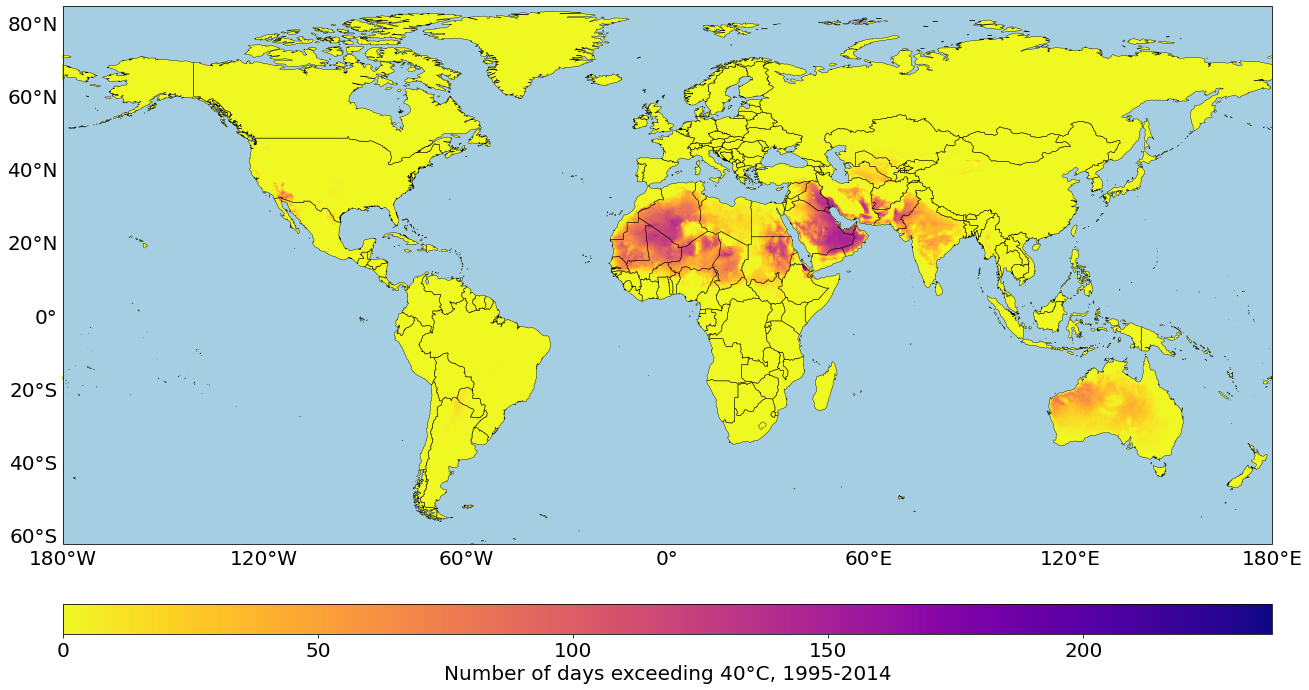

:Overlay
   .Image.I    :Image   [lon,lat]   (Number of days exceeding 40°C, 2040-2060, climate scenario SSP2-4.5)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
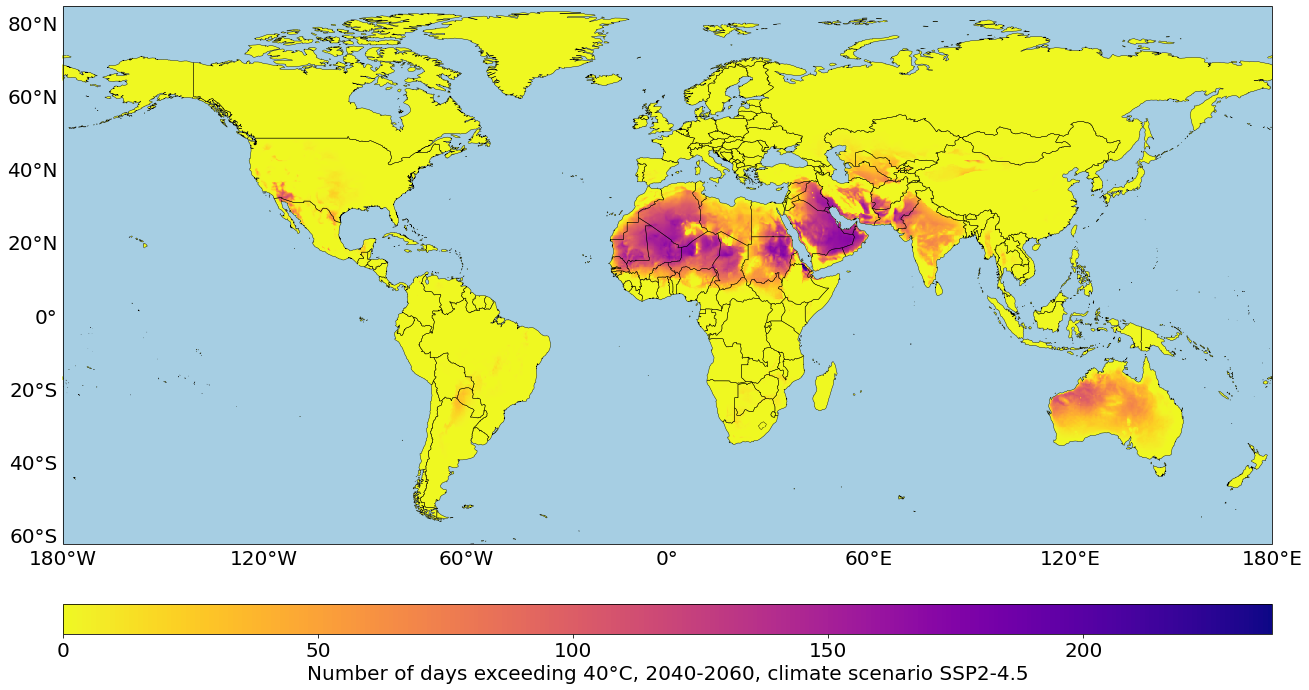

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Extreme temperature exposure index)
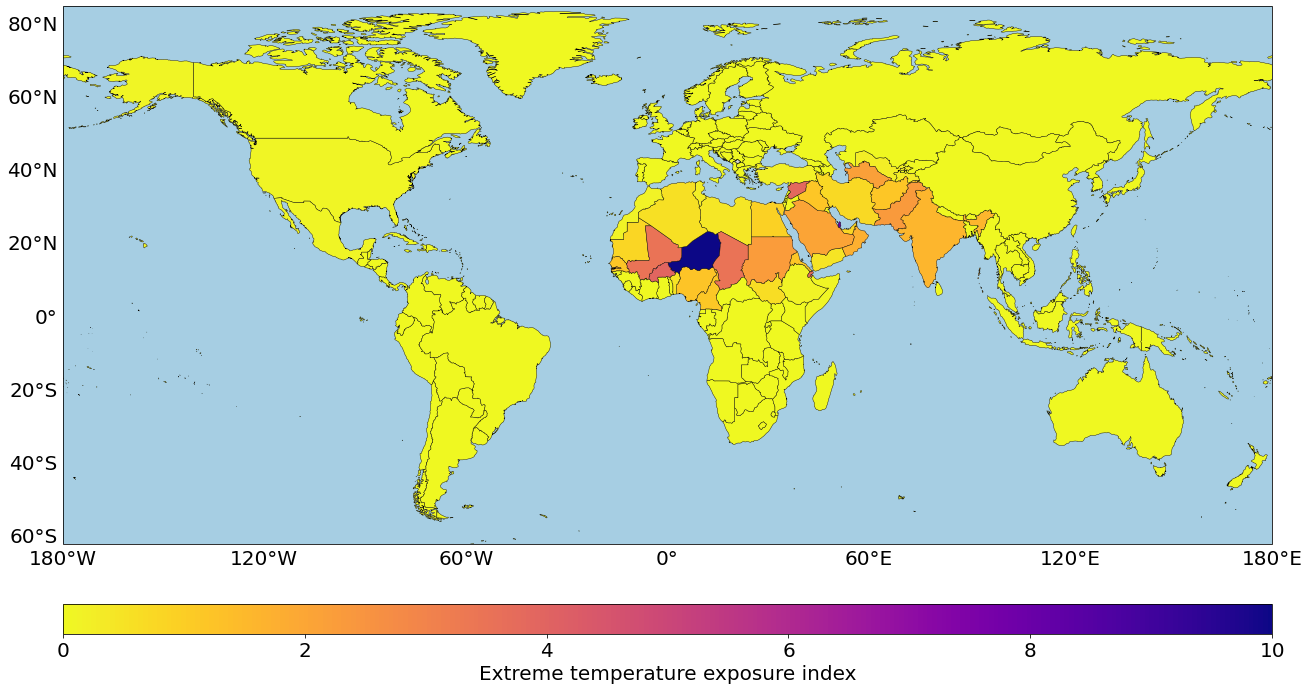

name  Extreme temperature exposure index  \
ISO_A3                                                             
NER                    Niger                           10.000000   
QAT                    Qatar                            8.121532   
BFA             Burkina Faso                            3.974248   
SYR     Syrian Arab Republic                            3.829911   
DJI                 Djibouti                            3.704510   
MLI                     Mali                            3.509753   
TCD                     Chad                            3.497157   
PAK                 Pakistan                            2.338738   
SDN                    Sudan                            2.292840   
TKM             Turkmenistan                            2.149762   

        Historical extreme temperature exposed population  \
ISO_A3                                                      
NER                                          2.002539e+06   
QAT                                          2.953463e+05   
BFA                                          1.702347e+05   
SYR                                          5.072420e+04   
DJI                                          1.290151e+04   
MLI                                          3.594613e+06   
TCD                                          3.037404e+06   
PAK                                          5.649992e+07   
SDN                                          1.456653e+07   
TKM                                          0.000000e+00   

        Historical % extreme temperature exposed population  \
ISO_A3                                                        
NER                                              0.152296     
QAT                                              0.253202     
BFA                                              0.012130     
SYR                                              0.002762     
DJI                                              0.017281     
MLI                                              0.268851     
TCD                                              0.325201     
PAK                                              0.352366     
SDN                                              0.487623     
TKM                                              0.000000     

        2050 SSP2-4.5 extreme temperature exposed population  \
ISO_A3                                                         
NER                                          4.977788e+07      
QAT                                          3.502640e+06      
BFA                                          1.318044e+07      
SYR                                          1.077746e+07      
DJI                                          4.403718e+05      
MLI                                          2.002491e+07      
TCD                                          1.509499e+07      
PAK                                          1.601109e+08      
SDN                                          4.413155e+07      
TKM                                          1.228216e+06      

        2050 SSP2-4.5 % extreme temperature exposed population  
ISO_A3                                                          
NER                                              0.987635       
QAT                                              0.931626       
BFA                                              0.344115       
SYR                                              0.322690       
DJI                                              0.326733       
MLI                                              0.562034       
TCD                                              0.617332       
PAK                                              0.547730       
SDN                                              0.679153       
TKM                                              0.179578

In [8]:
# Índice de temperatura extrema
v = "climatology-hd40-annual-mean"
# Umbral de valor extremo
tr = 8*7

# Datos históricos
# Cargamos datos
i = 5
ds_h = xr.open_dataset(wb_path + wb_files[i])
ds_h[v] = ds_h[v].astype(float) / 1e9 / 86400
var_h = ds_h.copy().drop_vars( ["lon_bnds", "lat_bnds"] )
# Calculamos la exposición
df_hc = exposicion(v, tr, var_h, pop_h, df_pop_h)

# Datos futuros
# Cargamos datos
i = 7
ds_f = xr.open_dataset(wb_path + wb_files[i])
ds_f[v] = ds_f[v].astype(float) / 1e9 / 86400
var_f = ds_f.copy().drop_vars( ["lon_bnds", "lat_bnds"] )
# Calculamos la exposición
df_fc = exposicion(v, tr, var_f, pop_f, df_pop_f)

# Cálculo del índice
vn = index_n[2]
indice(vn, 10, df_hc, df_fc)

# Mapas
vn_plot_h = ( "Number of days exceeding 40°C, 1995-2014" )
vn_plot_f = ( "Number of days exceeding 40°C, "
     + "2040-2060, climate scenario SSP2-4.5" )
do_map(var_h, var_f, vn_plot_h, vn_plot_f, "plasma_r")

# 10 países más altos
df_iso[["name", vn] + c_names[10:14]].sort_values(
    vn, ascending = False ).head(10)

:Overlay
   .Image.I    :Image   [lon,lat]   (1-day maximum rainfall as % of annual rainfall, 1995-2014)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
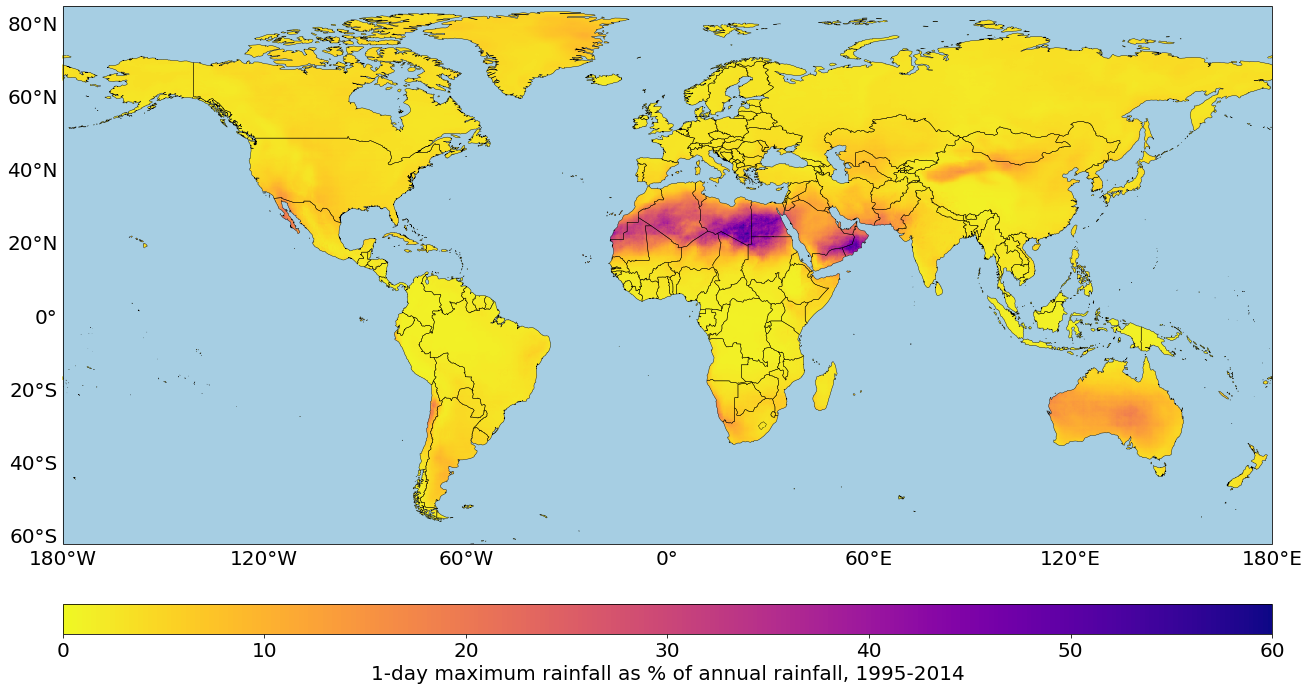

:Overlay
   .Image.I    :Image   [lon,lat]   (1-day maximum rainfall as % of annual rainfall, 2040-2060, climate scenario SSP2-4.5)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
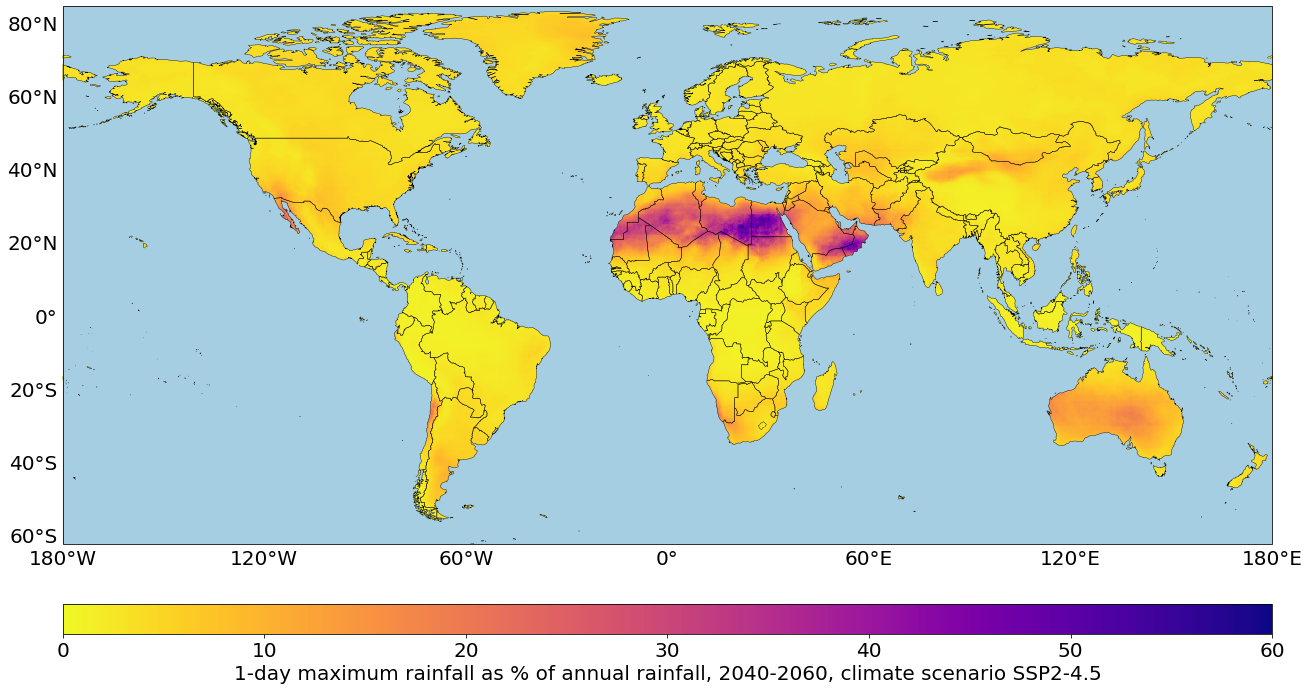

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Extreme rainfall exposure index)
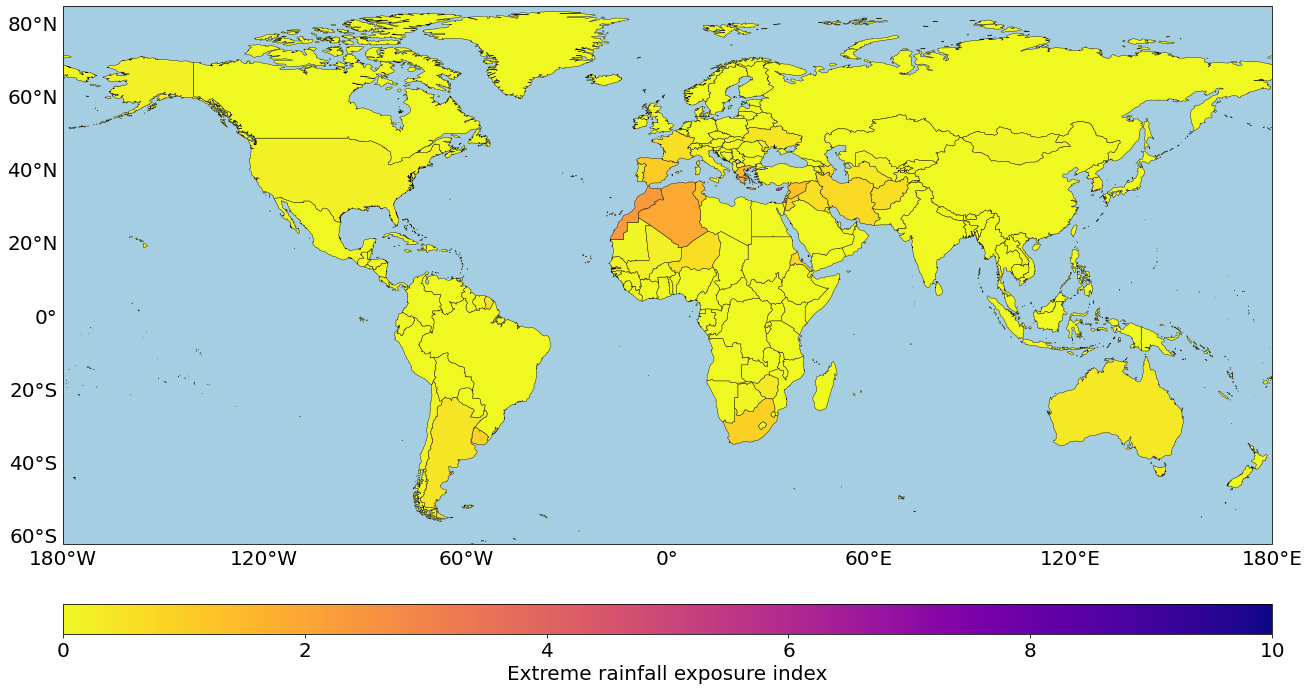

name  Extreme rainfall exposure index  \
ISO_A3                                                          
PCN                 Pitcairn                        10.000000   
CYP                   Cyprus                         5.107133   
MAR                  Morocco                         2.360022   
PSE      Palestine, State of                         2.040482   
DZA                  Algeria                         1.920447   
GRC                   Greece                         1.430720   
SYR     Syrian Arab Republic                         1.348084   
TUN                  Tunisia                         1.221224   
ESP                    Spain                         1.020123   
ZAF             South Africa                         0.972412   

        Historical extreme rainfall exposed population  \
ISO_A3                                                   
PCN                                       0.000000e+00   
CYP                                       0.000000e+00   
MAR                                       1.753229e+07   
PSE                                       1.753820e+06   
DZA                                       1.713788e+07   
GRC                                       4.968249e+06   
SYR                                       8.066386e+06   
TUN                                       8.332768e+06   
ESP                                       1.835166e+07   
ZAF                                       9.558494e+06   

        Historical % extreme rainfall exposed population  \
ISO_A3                                                     
PCN                                             0.000000   
CYP                                             0.000000   
MAR                                             0.559956   
PSE                                             0.404574   
DZA                                             0.523119   
GRC                                             0.453117   
SYR                                             0.439264   
TUN                                             0.827674   
ESP                                             0.428182   
ZAF                                             0.204249   

        2050 SSP2-4.5 extreme rainfall exposed population  \
ISO_A3                                                      
PCN                                          6.500599e+01   
CYP                                          8.021704e+05   
MAR                                          3.043352e+07   
PSE                                          4.918146e+06   
DZA                                          3.495999e+07   
GRC                                          6.680048e+06   
SYR                                          1.917335e+07   
TUN                                          1.217473e+07   
ESP                                          2.774295e+07   
ZAF                                          1.899163e+07   

        2050 SSP2-4.5 % extreme rainfall exposed population  
ISO_A3                                                       
PCN                                              1.000000    
CYP                                              0.510713    
MAR                                              0.795958    
PSE                                              0.608622    
DZA                                              0.715164    
GRC                                              0.596189    
SYR                                              0.574072    
TUN                                              0.949797    
ESP                                              0.530194    
ZAF                                              0.301490

In [9]:
# Índice de precipitación extrema
v1 = "climatology-pr-annual-mean"
v2 = "climatology-rx1day-annual-mean"
v = "climatology-percrx1-annual-mean"
# Umbral de valor extremo
tr = 5

# Datos históricos
# Cargamos datos
i = 0
ds_h1 = xr.open_dataset(wb_path + wb_files[i])
i = 9
ds_h2 = xr.open_dataset(wb_path + wb_files[i])
ds_h = ( ds_h2[v2] / ds_h1[v1] ).to_dataset(name = v) * 100
var_h = ds_h.copy()
# Calculamos la exposición
df_hc = exposicion(v, tr, var_h, pop_h, df_pop_h)

# Datos futuros
# Cargamos datos
i = 6
ds_f1 = xr.open_dataset(wb_path + wb_files[i])
i = 3
ds_f2 = xr.open_dataset(wb_path + wb_files[i])
ds_f = ( ds_f2[v2] / ds_f1[v1] ).to_dataset(name = v) * 100
var_f = ds_f.copy()
# Calculamos la exposición
df_fc = exposicion(v, tr, var_f, pop_f, df_pop_f)

# Cálculo del índice
vn = index_n[3]
indice(vn, 14, df_hc, df_fc)

# Mapas
vn_plot_h = ( "1-day maximum rainfall as % of annual rainfall, 1995-2014" )
vn_plot_f = ( "1-day maximum rainfall as % of annual "
     + "rainfall, 2040-2060, climate scenario SSP2-4.5" )
do_map(var_h, var_f, vn_plot_h, vn_plot_f, "plasma_r")

# 10 países más altos
df_iso[["name", vn] + c_names[14:18]].sort_values(
    vn, ascending = False ).head(10)

:Overlay
   .Image.I    :Image   [lon,lat]   (Hurricane wind, 100-year return period [km/h], 1995-2014)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
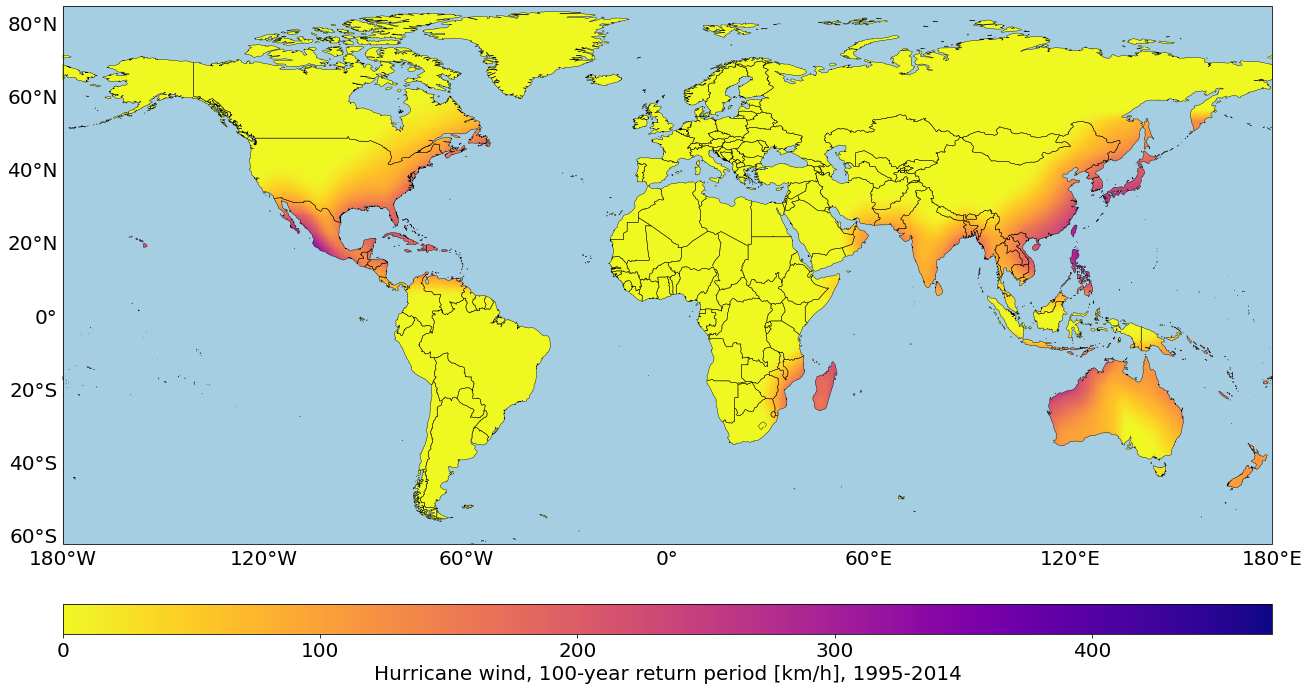

:Overlay
   .Image.I    :Image   [lon,lat]   (Hurricane wind, 100-year return period [km/h],2040-2060, climate scenario SSP2-4.5)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
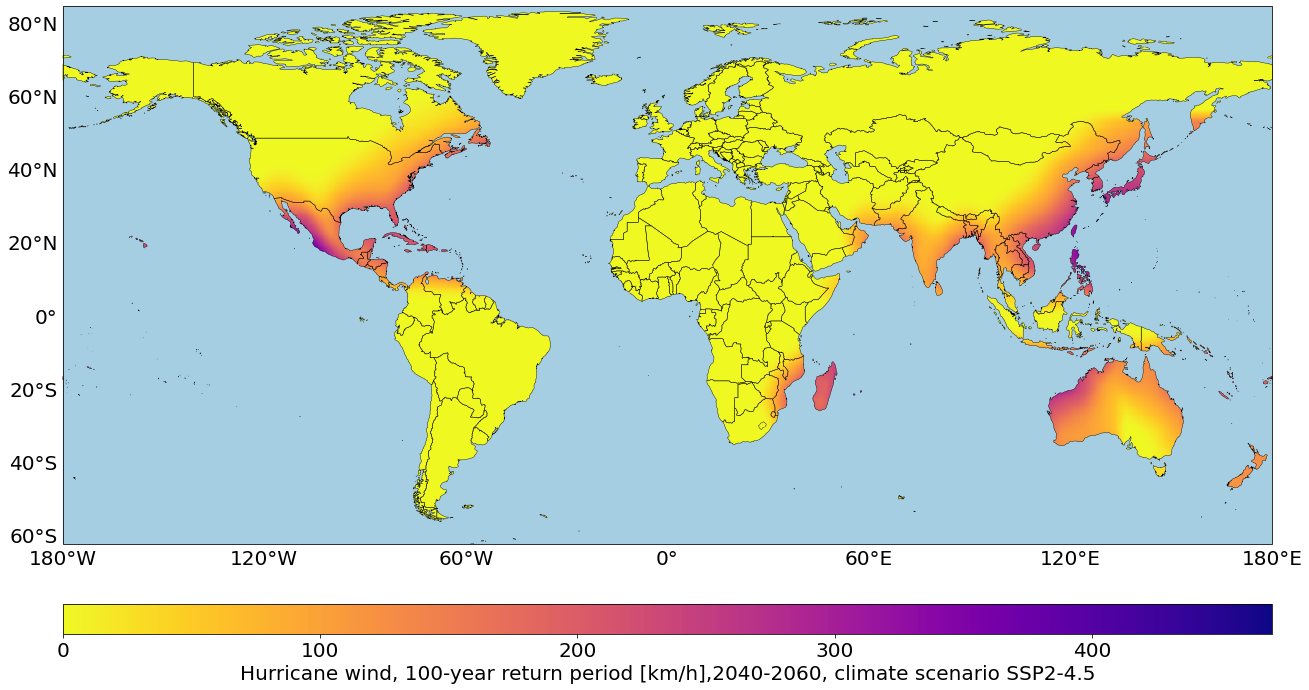

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Hurricane exposure index)
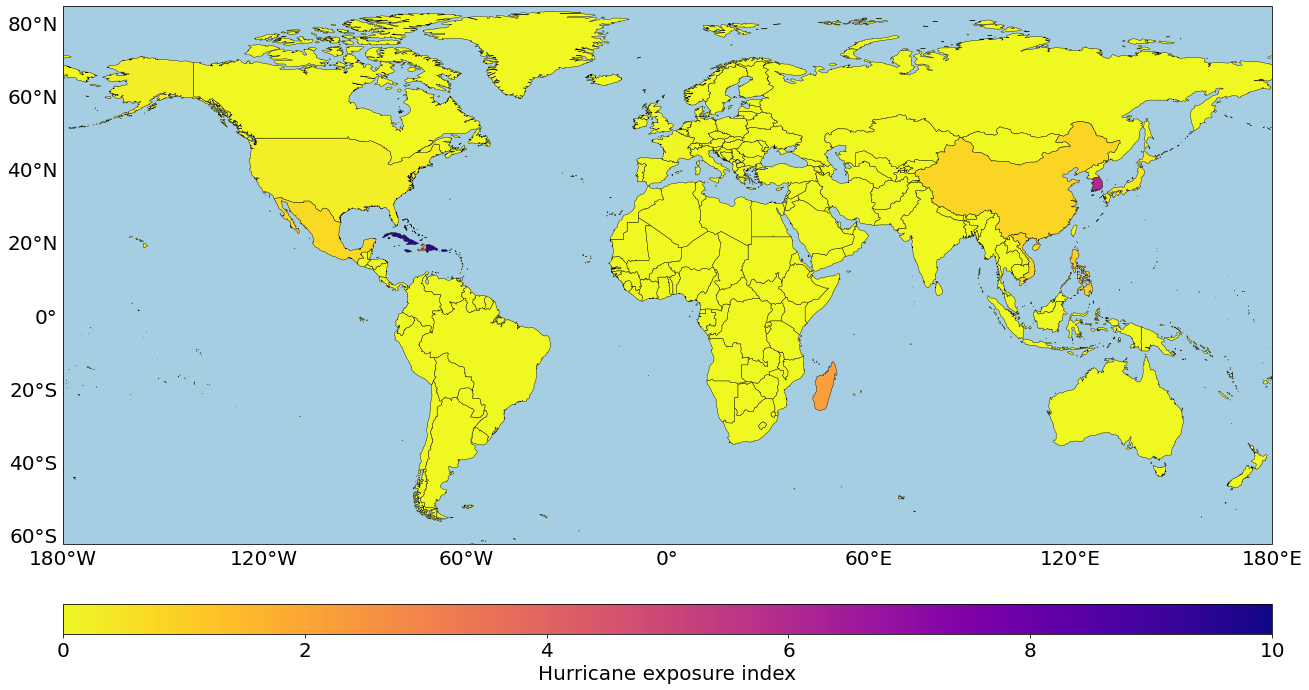

name  Hurricane exposure index  \
ISO_A3                                                       
BMU                      Bermuda                      10.0   
VGB     Virgin Islands (British)                      10.0   
TCA     Turks and Caicos Islands                      10.0   
CYM               Cayman Islands                      10.0   
MSR                   Montserrat                      10.0   
TON                        Tonga                      10.0   
PRI                  Puerto Rico                      10.0   
ATG          Antigua and Barbuda                      10.0   
NIU                         Niue                      10.0   
AIA                     Anguilla                      10.0   

        Historical hurricane exposed population  \
ISO_A3                                            
BMU                                         0.0   
VGB                                         0.0   
TCA                                         0.0   
CYM                                         0.0   
MSR                                         0.0   
TON                                         0.0   
PRI                                         0.0   
ATG                                         0.0   
NIU                                         0.0   
AIA                                         0.0   

        Historical % hurricane exposed population  \
ISO_A3                                              
BMU                                           0.0   
VGB                                           0.0   
TCA                                           0.0   
CYM                                           0.0   
MSR                                           0.0   
TON                                           0.0   
PRI                                           0.0   
ATG                                           0.0   
NIU                                           0.0   
AIA                                           0.0   

        2050 SSP2-4.5 hurricane exposed population  \
ISO_A3                                               
BMU                                   6.469231e+04   
VGB                                   3.402182e+04   
TCA                                   3.990870e+04   
CYM                                   6.667795e+04   
MSR                                   5.999655e+03   
TON                                   9.037617e+04   
PRI                                   2.962510e+06   
ATG                                   1.140140e+05   
NIU                                   1.002099e+03   
AIA                                   2.211394e+04   

        2050 SSP2-4.5 % hurricane exposed population  
ISO_A3                                                
BMU                                              1.0  
VGB                                              1.0  
TCA                                              1.0  
CYM                                              1.0  
MSR                                              1.0  
TON                                              1.0  
PRI                                              1.0  
ATG                                              1.0  
NIU                                              1.0  
AIA                                              1.0

In [10]:
# Índice de huracanes
v = "100_year_hurricane_wind"
# Umbral de valor extremo
tr = 209

# Datos históricos
# Cargamos datos
f = "../../Bases_de_datos/GAR2015/VIENTO_MUNDO_TR100_INT1.grd"
hurr = rio.open_rasterio(f).to_dataset( "band"
    ).rename( {"x": "lon", "y": "lat", 1: v})
# Interpolamos datos para hacer coincidir mallas
regridder = xe.Regridder( hurr, pop_h, method = "bilinear", )#periodic = True )
var_h = regridder( hurr, keep_attrs = True )
# Calculamos la exposición
df_hc = exposicion(v, tr, var_h, pop_h, df_pop_h)

# Datos futuros
# Cargamos datos
var_f = var_h * 1.1
# Calculamos la exposición
df_fc = exposicion(v, tr, var_f, pop_f, df_pop_f)

# Cálculo del índice
vn = index_n[4]
indice(vn, 18, df_hc, df_fc)

# Mapas
vn_plot_h = ( "Hurricane wind, 100-year return period [km/h], 1995-2014" )
vn_plot_f = ( "Hurricane wind, 100-year return period [km/h],"
    + "2040-2060, climate scenario SSP2-4.5" )
do_map(var_h, var_f, vn_plot_h, vn_plot_f, "plasma_r")

# 10 países más altos
df_iso[["name", vn] + c_names[18:22]].sort_values(
    vn, ascending = False ).head(10)

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Hurricane exposure index)
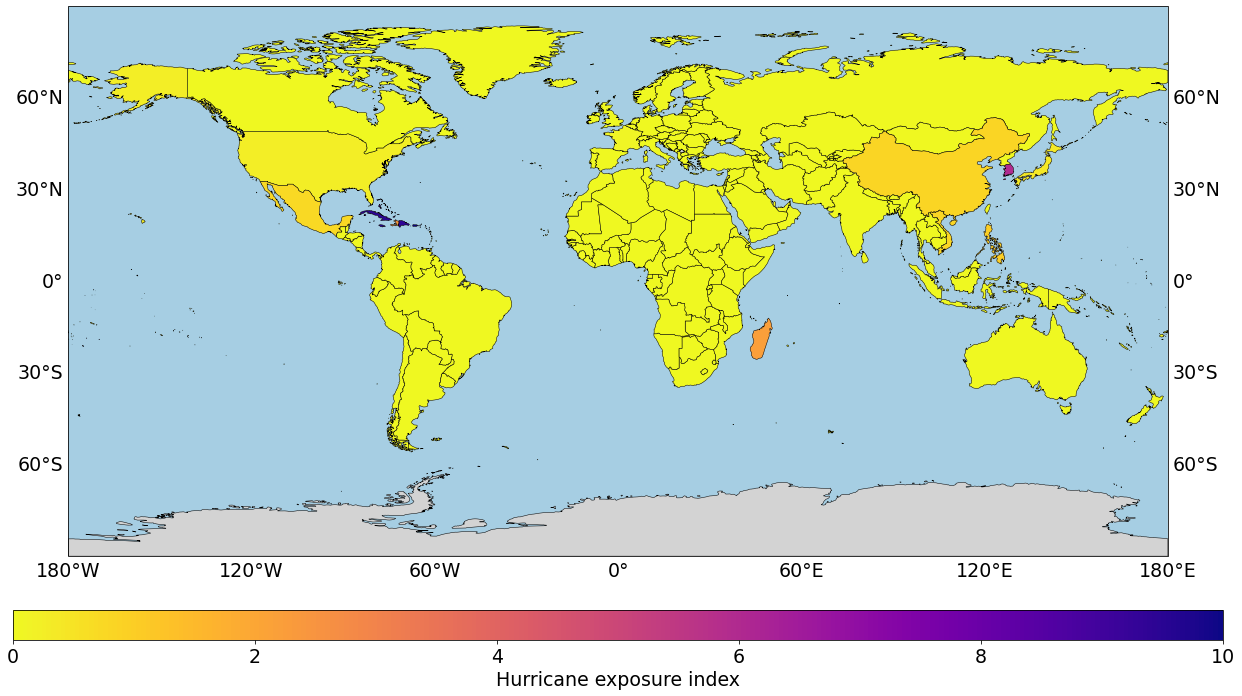

In [11]:
def hook(plot, element):
    cax = plot.handles["cax"]
    ax = plot.handles["axis"]
    bbox = ax.get_position()
    l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height
    cax.set_position([l, 0.9*b, w, 0.05*h])
options = { "bgcolor": "lightblue", "hooks": [hook], "ylim":(-90,90),
    "colorbar": True, "colorbar_opts": {"orientation": "horizontal"} } 

ocean = gv.Polygons( gpd.read_file(ocean_path), vdims = "min_zoom"
    ).opts( linewidth = 0, cmap = "Paired")
borders.loc["ATA", vn]= np.nan
map_v = gv.Polygons( borders, vdims = vn ).opts( linewidth = 0.5,
    cmap = "plasma_r", aspect = 2,
    **options )
map = ( ocean * map_v ).opts(bgcolor = "lightgray", fontscale = 1.9 )
gv.output( map, size = 600 )

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Climate change exposure index)
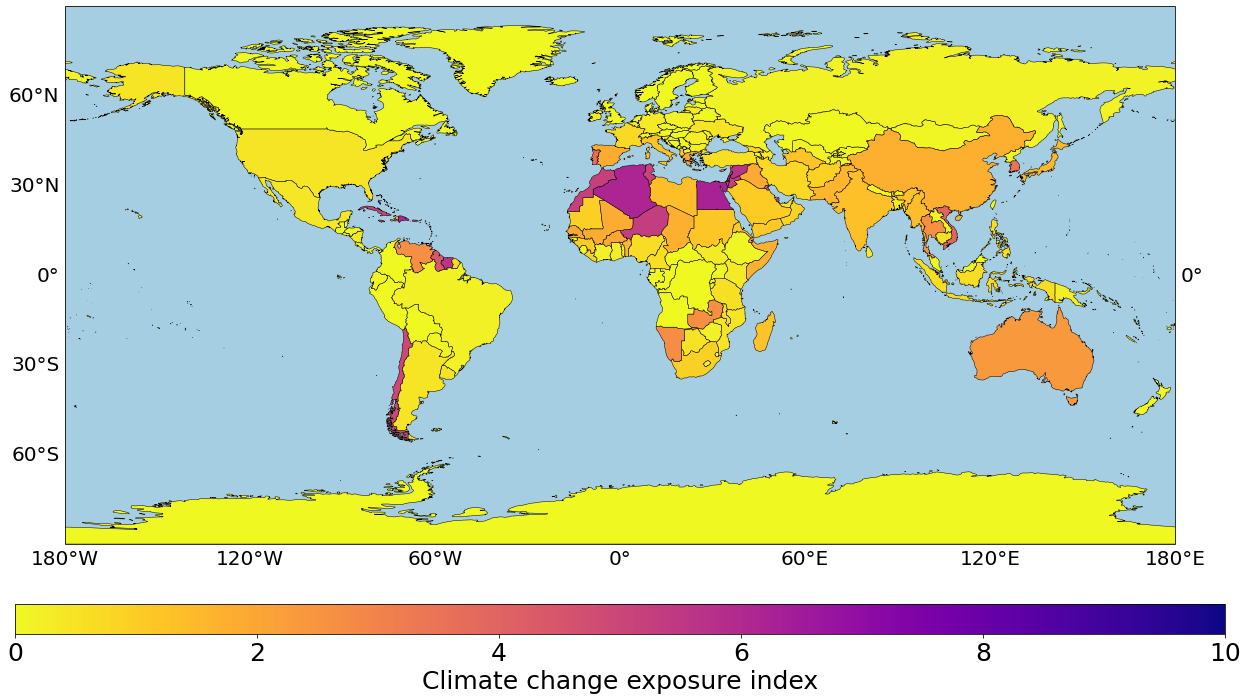

name  Sea-level rise exposure index  \
ISO_A3                                                       
PCN                Pitcairn                       0.000000   
MSR              Montserrat                       5.994232   
DMA                Dominica                       1.954855   
AIA                Anguilla                       3.831151   
BMU                 Bermuda                       2.996683   
EGY                   Egypt                       2.436447   
CYM          Cayman Islands                       2.314401   
DZA                 Algeria                       0.151193   
DOM      Dominican Republic                       0.000000   
ATG     Antigua and Barbuda                       2.169790   

        Drought exposure index  Extreme temperature exposure index  \
ISO_A3                                                               
PCN                  10.000000                            0.000000   
MSR                   0.000000                            0.000000   
DMA                  10.000000                            0.000000   
AIA                   0.000000                            0.000000   
BMU                   0.000000                            0.000000   
EGY                   9.190693                            0.932260   
CYM                   0.000000                            0.000000   
DZA                   9.641745                            0.572117   
DOM                   2.865633                            0.000000   
ATG                   0.000000                            0.000000   

        Extreme rainfall exposure index  Hurricane exposure index  \
ISO_A3                                                              
PCN                           10.000000                  0.000000   
MSR                            0.000000                 10.000000   
DMA                            0.000000                  3.927758   
AIA                            0.000000                 10.000000   
BMU                            0.000000                 10.000000   
EGY                            0.000000                  0.000000   
CYM                            0.000000                 10.000000   
DZA                            1.920447                  0.000000   
DOM                            0.000000                  9.384625   
ATG                            0.000000                 10.000000   

        Climate change exposure index  
ISO_A3                                 
PCN                         10.000000  
MSR                          7.997116  
DMA                          7.941306  
AIA                          6.915576  
BMU                          6.498342  
EGY                          6.279700  
CYM                          6.157201  
DZA                          6.142751  
DOM                          6.125129  
ATG                          6.084895

In [12]:
# Índice de exposición al cambio climático

# Calculamos el índice
vn = index_n[5]
df_iso[vn] = df_iso[index_n[:-1]].mean(axis = 1)

# Normalización 0-10
min_v = df_iso[vn].min()
max_v = df_iso[vn].max()
rng_v = max_v - min_v
df_iso[vn] = 10 * (df_iso[vn] - min_v ) / rng_v
borders[vn] = df_iso[vn]

# Mapa
map_v = gv.Polygons( borders, vdims = vn ).opts( linewidth = 0.5,
    cmap = "plasma_r", aspect = 2, fontscale = 2.5, **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Guardamos los valores
df_iso.to_csv(path_r + "climate_index.csv")

# 10 países más altos
df_iso[["name"] + index_n].sort_values( vn, ascending = False ).head(10)

In [13]:
# Información para un país específico
country = "FJI"

df_iso.loc[ country, ["name"] + index_n + c_names ]

name                                                              Fiji
Sea-level rise exposure index                                      0.0
Drought exposure index                                             0.0
Extreme temperature exposure index                                 0.0
Extreme rainfall exposure index                                    0.0
Hurricane exposure index                                      0.111139
Climate change exposure index                                 0.055569
Historical population                                       807657.375
2050 SSP2-4.5 population                                    937559.125
Flood plain population 2000                                    33804.0
% Flood plain Population 2000                                 4.163054
Flood plain population 2060                                    33913.0
% Flood plain Population 2060                                 3.286143
Historical drought exposed population                              0.0
Histor